# Heterogeneous Graphs
So far, all the discussion has been about graphs with one edge type and one node type (homogeneous); complexity arises then once graphs with multiple edge and node types are considered and thus require differnt approaches. Due to this added complexity, a heterogeneous graph is defined as $G=(V,R,T,E)$ (there are other definitions), where nodes with node types $v_i\in V$ (node type $T(v_i)$), and relations with relation types $(v_i,e,v_j)\in R$ (edge type $e\in E$).

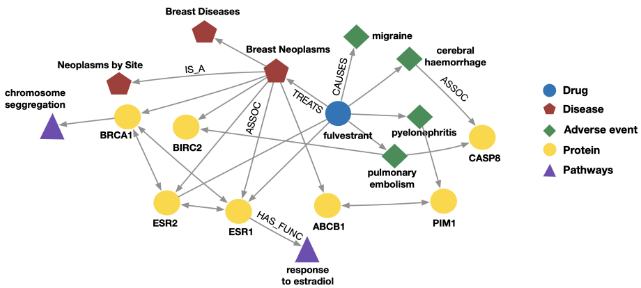

A good benchmark for heterogeneous graphs is the https://ogb.stanford.edu/docs/nodeprop/ from Microsoft Academic Graph (MAG) which has 4 types of entities; papers (736k nodes), authors (1.1m nodes), institutions (9k nodes), and fields of study (60k nodes)

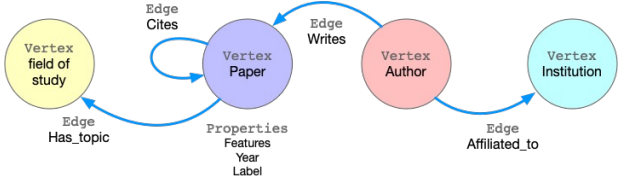

The most naive approach is to treat types of nodes and edges as features (add one-hot indicator for nodes and edges, etc.), reducing the heterogeneous graph to a standard graph. Even though heterogeneous graphs are more express representation (captures different interaction types between entities), it is more expensive for computations, storage, and requires a more complex implementation; additionally, there are other ways to convert a heterogeneous graph into a standard one , and it thus raises the question as to "when a heterogeneous graph is needed"? It is exclusively required for situations where:
- Different node/edge types have differetne shape of features (an "author node" has 4 dimensional feature as opposed to a "paper node" has 5 dimensional feature).
- differetn relation types represent differetn types of interactions ($(\text{English}, \text{translate}, \text{French})$ and $(\text{English}, \text{translate}, \text{Chinese})$ require different models)

## Relational GCN
Consider a directed graph (same approach as undirected but message propogates only in direction of edge) with one relation (type).  If the graph has multiple relation types, it would need different neural networks for different relation types. 

<table><tr><td>

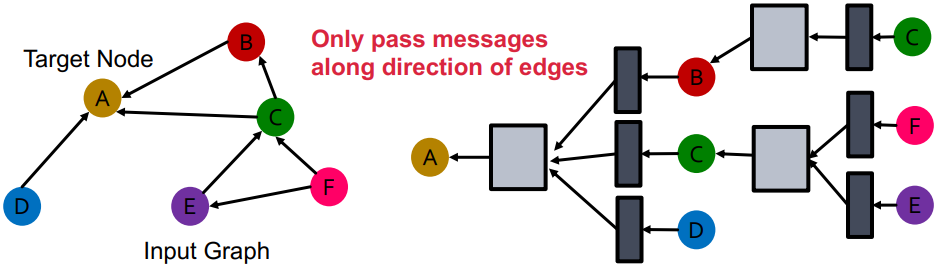
</td><td>

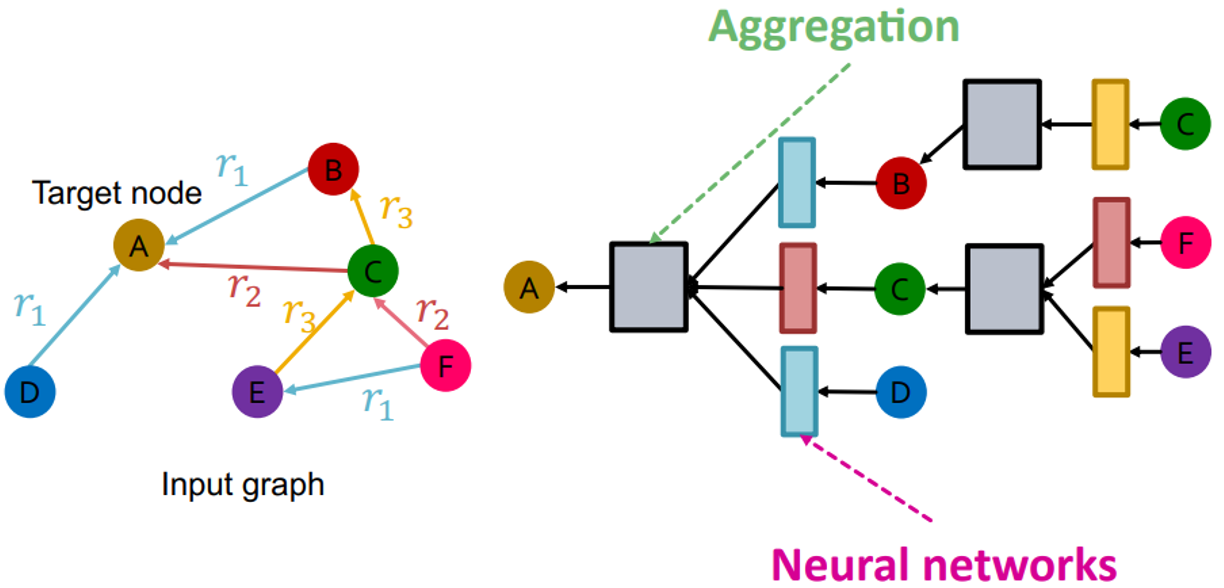
</td></tr></table>

Therefore, recalling the basic GCN model layer for homogeneous graphs (without self injection), a new layer can be defined for a heterogeneous graph $$h_{i}^{(k-1)}=\sigma(\sum_{r\in R}\sum_{N_1(i,r)}W^{(k-1)}_r\frac{h_j^{(k)}}{|N_1(i,r)|}+B^{(k-1)}h_i^{(k)})$$
$i\in N_{k-1}(v),\;h_i^{K}=\text{x}_i$, $\forall k\in\{K,\ldots,0\}$, where $N_1(i,r)=\{j\in N_1(i): i\rightsquigarrow j=r\}$, and $i\rightsquigarrow j$ is the relation between nodes $i$ and $j$.

This means that each relation has $L$ matrices, each with dimension $W^{(k)}_r\in\mathbb{R}^{d^{(k-1)}}\times\mathbb{R}^{d^{(k)}}$; making the numbers of parameteres rapidly grow relative to the number of relations (overfitting becomes an issue). There are 2 methods to regularize the weight of $W^{(k)}_r$
1. **Block Diagonal Matrices**: It is possible to make the weights sparse, where only nearby neurons/dimensions can interact throuhgh $W$. Specifically, using block diagonal matrices for $W_r$ reduces the dimensionality from ${d^{(k-1)}}\times{d^{(k)}}$ to $\mathbb{B}\times\frac{d^{(k-1)}}{\mathbb{B}}\times\frac{d^{(k)}}{\mathbb{B}}$ where $\mathbb{B}\times\mathbb{B}$ is the dimensionality of the diagonal blocks.
2. **Basis/Dictionary Learning**: A different approach is to share weights across different relations, representing the matrices of each relation as a linear combination of basis transformations, $W_r=\sum_{b=1}^{\mathbb{B}}a_{rb}V_b$ (where $V_b$ is shared across all relations); and the objective becomes to learn $\{\{a_{rb}\}_{b=1}^{\mathbb{B}}\}_{r\in R},\{V_b\}_{b=1}^{\mathbb{B}}$ ($\{a_{rb}\}_{b=1}^{\mathbb{B}}$ is a $\mathbb{B}$ scalar) instead of $\{W_r\}_{r\in R}$

Training and predictions are then made using the same procedure as for standard graphs; with the added complexity that is introduced by the fact that instead of a single GCN, multiples are working together, interwoven to one another. Further, the idea realised in RGCN can be extended into RGNN (RGraphSAGE, RGAT, etc.>)

## Knowledge Graph (KG) Embedding
Knowledge Graphs are an example of heterogeneuos graphs which captures real-world relationships between entities, with the main task being *KG Completion*, $(v_i,e)\rightarrow (v_i,e,v_j)$; for a given a head node $v_i$ and edge type $e$, predict the missing tail node $v_j$ of the relation.

This can be achieved by modeling entities and relations in embeddings space $\mathbb{R}^k$ such that the embeddings of $(v_i,e)$ is close to the emebdding of $v_j$. This method can therefore exhibit the following patterns within the embedding space.

- **Symmetric relations**: $r(h,t)\rightarrow r(t,h)$
- **Antisymmetric relations**: $r(h,t)\rightarrow \neg r(t,h)$
- **Inverse relations**: $r_2(h,t)\rightarrow r_1(t,h)$
- **Composition (Transitive) relations**: $r_1(x,y) \cap r_2(y,z)\rightarrow r_3(x,z)$
- **1-to-N relations**: $r(h,t_1),r(h,t_2),\ldots,r(h,t_n)$ mare all *true*

### TransE
For a relation $(v_i,e,v_j)$, let $v_i,e,v_j\in\mathbb{R}^k$ be embedding vectors such that $v_i+e\approx v_j$ if the given link exists, else $v_i+e\neq v_j$. With this model, a scoring function can then be $f_e(v_i,v_j)=-||v_i+e-v_j||$

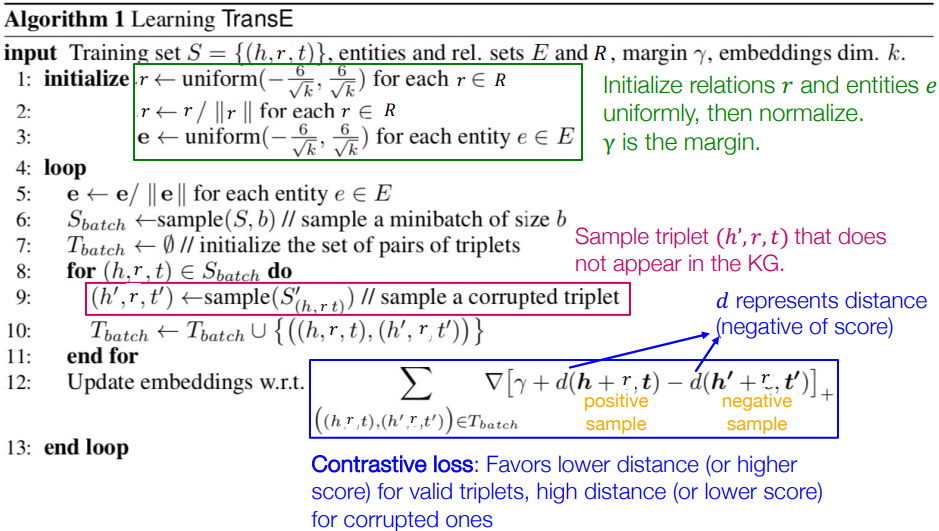
- **Symmetric relations**: given $h+r=t$, for $t+r=h$, $r=0$ and $h=t$. However, $h$ and $t$ are two different entities and should be mapped to different locations; thus *TransE* cannot model symmetric relations.
- **Antisymmetric relations**: given $h+r=t$, then $t+r=h+2r\neq h$ (unless $r=0$ which should not occur as per above)
- **Inverse relations**: given $h+r_2=t$, then $t+r_1=h$ by setting $r_1=-r_2$.
- **Composition (Transitive) relations**: given $x+r_1=y$ and $y+r_2=z$, then $x+r_3=z$ by settign $r_3=r_1+r_2$
- **1-to-N relations**: Similar to *symmetric relations*, this too cannot be modelled.

### TransR
### DistMult
### ComplEx